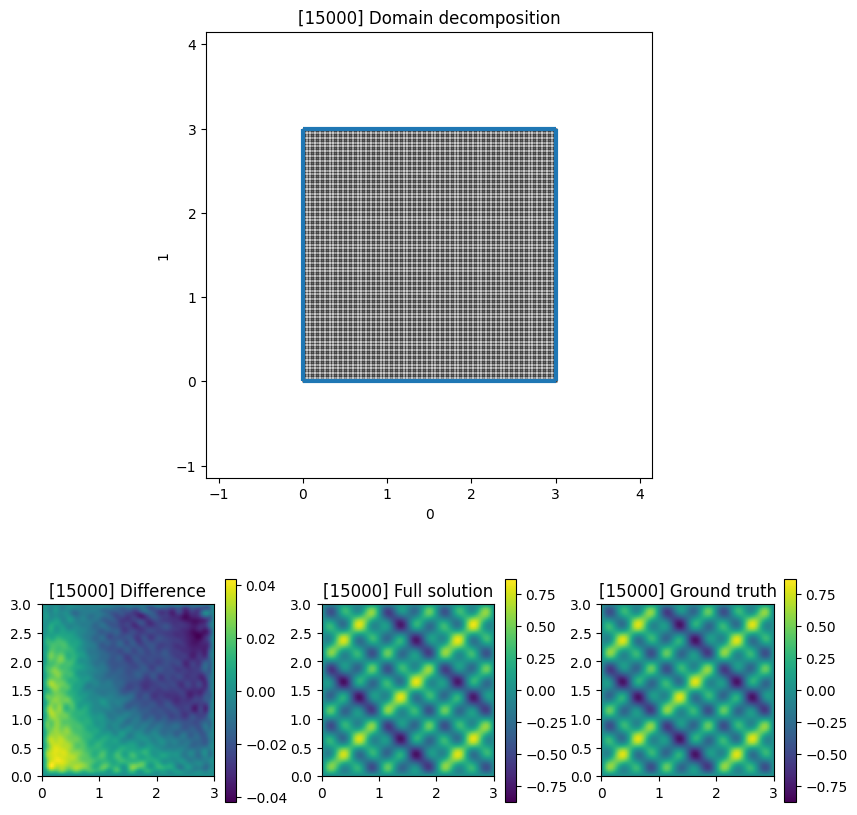

[INFO] 2024-12-04 20:37:43 - [i: 16000/100000] loss: 25.0714 rate: 63.8 elapsed: 0.08 hr test


KeyboardInterrupt: 

In [3]:
import numpy as np

from fbpinns.domains import RectangularDomainND
from fbpinns.problems import Laplace2D
from fbpinns.decompositions import RectangularDecompositionND
from fbpinns.networks import FCN
from fbpinns.schedulers import AllActiveSchedulerND
from fbpinns.constants import Constants, get_subdomain_ws
from fbpinns.trainers import FBPINNTrainer

subdomain_xs=[np.array([1.5]), np.array([1.5])]

c = Constants(
    domain=RectangularDomainND,
    domain_init_kwargs = dict(
        xmin=np.array([0.,0.]),
        xmax=np.array([3.,3.])
        ),
    problem=Laplace2D,
    problem_init_kwargs = dict(),
    decomposition=RectangularDecompositionND,
    decomposition_init_kwargs=dict(
        subdomain_xs=subdomain_xs,
        subdomain_ws=np.array([3, 3]),
        unnorm=(0.,3.),
    ),
    network=FCN,
    network_init_kwargs = dict(
        layer_sizes = (2, 50, 50, 50, 24, 1),
    ),
    scheduler = AllActiveSchedulerND,
    ns=((100,100),),
    n_test=(100,100),
    n_steps=100000,
    clear_output=True,
)

run = FBPINNTrainer(c)
all_params = run.train()